In [31]:
# implement Association Rule Mining techniques using the Apriori algorithm
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [32]:
# Load the data
df = pd.read_excel('Online retail.xlsx')
transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))
df

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [33]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [34]:
# Convert to list of lists
transactions_list = transactions.tolist()

In [35]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [36]:
# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [37]:
# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [38]:
# Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


In [39]:
# Filter based on thresholds
filtered_rules = rules[(rules['confidence'] >= 0.2) & (rules['lift'] >= 1.0)]


In [40]:
# Show top 10 rules
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                            antecedents          consequents   support  \
216                     (herb & pepper)        (ground beef)  0.016000   
384          (mineral water, spaghetti)        (ground beef)  0.017067   
194                          (tomatoes)  (frozen vegetables)  0.016133   
190                            (shrimp)  (frozen vegetables)  0.016667   
366               (milk, mineral water)  (frozen vegetables)  0.011067   
385        (mineral water, ground beef)          (spaghetti)  0.017067   
368  (mineral water, frozen vegetables)               (milk)  0.011067   
378               (milk, mineral water)        (ground beef)  0.011067   
255                              (soup)               (milk)  0.015200   
228                         (spaghetti)        (ground beef)  0.039200   

     confidence      lift  
216    0.323450  3.291555  
384    0.285714  2.907540  
194    0.235867  2.474134  
190    0.233645  2.450820  
366    0.230556  2.418415  
385    0.416938  

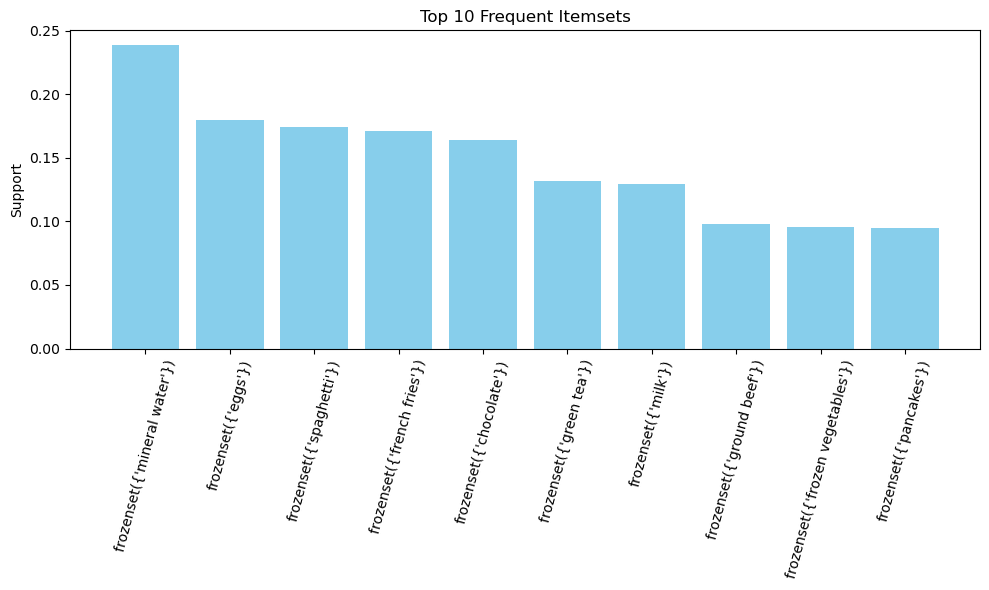

In [41]:
import matplotlib.pyplot as plt

# Top 10 frequent items
top_items = frequent_itemsets.sort_values(by="support", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xticks(rotation=75)
plt.title("Top 10 Frequent Itemsets")
plt.ylabel("Support")
plt.tight_layout()
plt.show()